In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv,Series, DataFrame
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas.io.data as web
import datetime
import tensorflow as tf
from sklearn import svm, preprocessing
import matplotlib.pyplot as plt
import math

Using TensorFlow backend.
C:\Program Files\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
class KOSPIDATA:

    def __init__(self):
        start = datetime.datetime(1998, 5, 1)
        end = datetime.datetime(2016, 12, 31)
        kospi = web.DataReader("^KS11", "yahoo", start, end)

        self.arr_date= np.array(kospi.index)
        self.arr_open = np.array(kospi.Open, dtype=float)
        self.arr_close= np.array(kospi['Adj Close'], dtype=float)
        self.arr_high= np.array(kospi.High, dtype=float)
        self.arr_low= np.array(kospi.Low, dtype=float)
        self.arr_volume= np.array(kospi.Volume, dtype=float)

In [3]:
def create_dataset(dataset, look_back=3):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [4]:
K = KOSPIDATA()

# FEATURES = ['high', 'low', 'open', 'close', 'volume']
FEATURES = ['high', 'low', 'open', 'close']

data = {'year': K.arr_date,
        'open': K.arr_open,
        'high': K.arr_high,
        'low': K.arr_low,
        'close': K.arr_close}

# df = DataFrame(data, columns=['year', 'high', 'low', 'open', 'close'])
df = DataFrame(data, columns=['year','close'])

In [5]:
dataset = df['close'].values

In [6]:
np.random.seed(7)

In [7]:
# dataset = dataset.reshape(-1,1)

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [9]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

In [10]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [11]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 3))`
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
5s - loss: 0.0134
Epoch 2/100
4s - loss: 2.4136e-04
Epoch 3/100
4s - loss: 2.0611e-04
Epoch 4/100
4s - loss: 1.9715e-04
Epoch 5/100
4s - loss: 1.9379e-04
Epoch 6/100
5s - loss: 1.8846e-04
Epoch 7/100
4s - loss: 1.8355e-04
Epoch 8/100
4s - loss: 1.7460e-04
Epoch 9/100
4s - loss: 1.6774e-04
Epoch 10/100
4s - loss: 1.6490e-04
Epoch 11/100
4s - loss: 1.6253e-04
Epoch 12/100
4s - loss: 1.5113e-04
Epoch 13/100
4s - loss: 1.5217e-04
Epoch 14/100
4s - loss: 1.4866e-04
Epoch 15/100
4s - loss: 1.3879e-04
Epoch 16/100
4s - loss: 1.3625e-04
Epoch 17/100
4s - loss: 1.3093e-04
Epoch 18/100
4s - loss: 1.3445e-04
Epoch 19/100
4s - loss: 1.3063e-04
Epoch 20/100
4s - loss: 1.2781e-04
Epoch 21/100
4s - loss: 1.2585e-04
Epoch 22/100
4s - loss: 1.2802e-04
Epoch 23/100
4s - loss: 1.2771e-04
Epoch 24/100
5s - loss: 1.2543e-04
Epoch 25/100
5s - loss: 1.2361e-04
Epoch 26/100
5s - loss: 1.2295e-04
Epoch 27/100
5s - loss: 1.2670e-04
Epoch 28/100
5s - loss: 1.2335e-04
Epoch 29/100
5s - loss: 1.2200e-0

In [13]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [14]:
testPredict.shape

(1520, 1)

In [15]:
trainPredict

array([[ 0.05559505],
       [ 0.05271999],
       [ 0.04707202],
       ..., 
       [ 0.82199168],
       [ 0.83551657],
       [ 0.84600133]], dtype=float32)

In [16]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [17]:
trainScore = math.sqrt(((trainY[0] - trainPredict[:,0]) ** 2).mean(axis=None))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(((testY[0] - testPredict[:,0]) ** 2).mean(axis=None))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting

Train Score: 814.91 RMSE
Test Score: 99.10 RMSE


In [18]:
trainPredictPlot = np.zeros_like(dataset)
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict[:,0]

In [19]:
testPredictPlot = np.zeros_like(dataset)
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1] = testPredict[:,0]

In [20]:
plt.plot(scaler.inverse_transform(dataset))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [21]:
plt.plot(trainPredictPlot)

In [22]:
plt.plot(testPredictPlot)

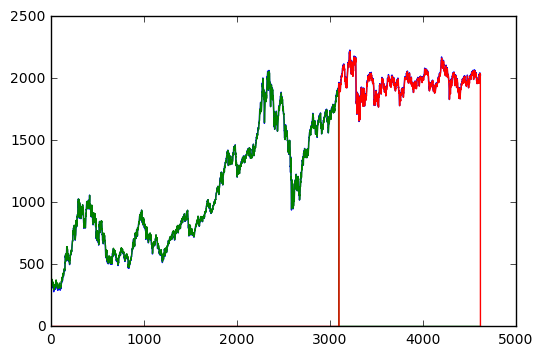

In [23]:
plt.show()

trainPredictPlot = np.empty_like(dataset)
print(trainPredictPlot.shape)
trainPredictPlot[:] = np.nan
print(trainPredictPlot.shape)
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict[:,0]
# shift test predictions for plotting